In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import cv2
import numpy as np
import pickle
import glob
from image_process import *

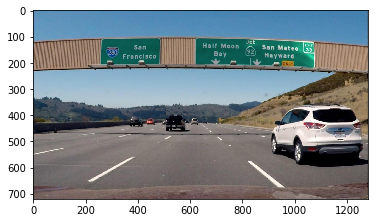

In [28]:
image=cv2.imread("signs_vehicles_xygrad.png")
#image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(np.flip(image,axis=2))

In [3]:
# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(30, 100))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(50, 190))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(20, 150))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))

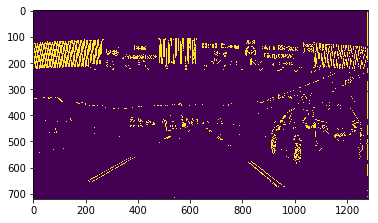

In [4]:
plt.imshow(gradx)

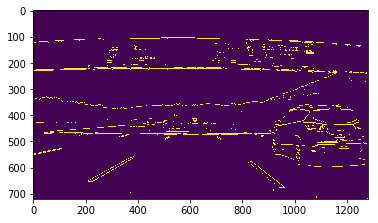

In [5]:
plt.imshow(grady)

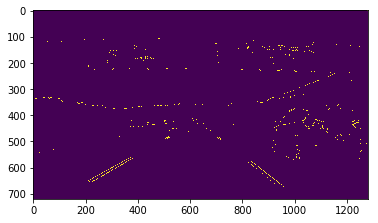

In [6]:
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1))] = 1
plt.imshow(combined)

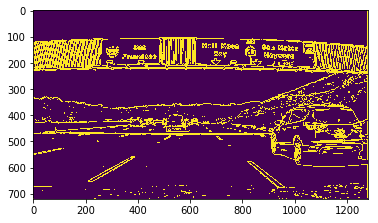

In [7]:
plt.imshow(mag_binary)

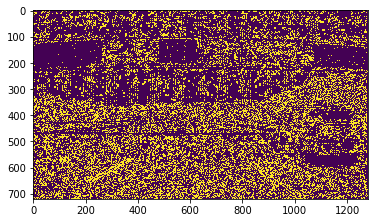

In [8]:
plt.imshow(dir_binary)

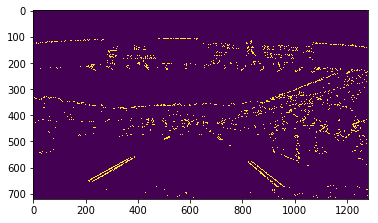

In [9]:
combined = np.zeros_like(dir_binary)
combined[((mag_binary == 1) & (dir_binary == 1))] = 1
plt.imshow(combined)

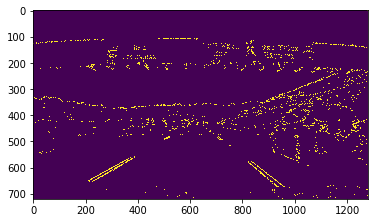

In [10]:
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
plt.imshow(combined)

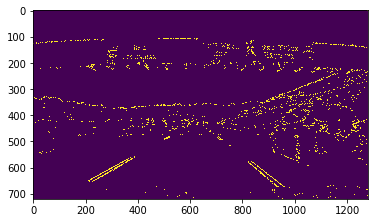

In [11]:
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
plt.imshow(combined)

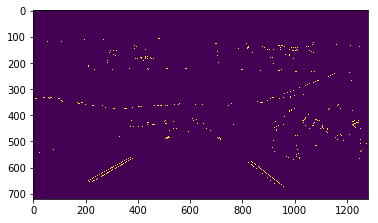

In [12]:
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1) & (dir_binary == 1))] = 1
plt.imshow(combined)

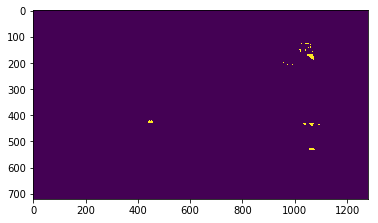

In [74]:
b_img=channel_select(image, color_space='Lab', thresh=(90, 190), channel=2)
b_img=np.logical_not(b_img)
plt.imshow(b_img)

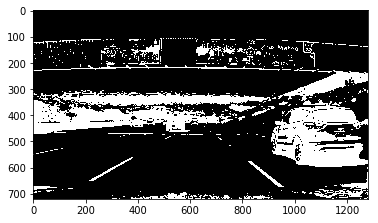

In [76]:
b_img=channel_select(image, color_space='LUV', thresh=(90, 200), channel=0)
b_img=np.logical_not(b_img)
plt.imshow(b_img,cmap='gray')